## STRUCTURED QUERY LANGUAGE (SQL)
SQL is a programming language used for managing or querying data stored in a relational database management system (RDBMS). A relational database is a collection of data with pre-defined relationships between them. 
It consists of tables with rows and columns.
1. Tables: holds information about objects in the database.
2. Columns: is of a specific data type and holds the value of an attribute.
3. Rows: reperesents a collection of related values of an object.

## PYTHON SQL LIBRARIES
There are a number of SQL libraries that could be used with python such as SQLite, MySQL, PostgreSQL and SQLAlchemy. Our focus would be SQLite library.  This library allows us to interact with an SQLite database. SQLite databases are serverless and self-contained, since they read and write data to a file. To connect to a database, we use the conect class of the SQLite library. Theis class establishes a connection to a database file if it already exixts or create a new database file if doesnt exist.

In [1]:
import sqlite3
conn = sqlite3.connect('test.db')
print(conn)

The connect() returns a connection object which is used to query the database file.

## CREATING TABLES
Databases support CRUD (Create Read Update Delete) operations.
To create a table in SQL, we use the `CREATE TABLE` statement followed by the table name. The statement `IF NOT EXISTS` is used to prevent an exception that occurs for trying to create an existing table. 
Each field in the table should be of a datatype (int, text, varchar etc) and can be set to a compulsory field using the `NOT NULL` statement. The `PRIMARY KEY` statement is used to specify a field as primary key. Primary keys are unique and are used to identify a row in a database.

In [2]:
sql_command = '''CREATE TABLE IF NOT EXISTS Student(
student_id INT PRIMARY KEY,
name VARCHAR(50) NOT NULL,
gender TEXT NOT NULL,
DOB DATE);'''

To send an sql command to the SQL database, we need to create a cursor object. A cursor object is a control structure for tranversing through records in a database. To create a cursor object, we call the cursor() method on the connection object.

In [3]:
cursor = conn.cursor()

To execute the query, we call the execute method on the cursor object.

In [4]:
cursor.execute(sql_command)

## INSERTING VALUES INTO TABLES
The `INSERT INTO` statement is used to insert values in to the database. Let's see how we can do that using sqlite library.

In [5]:
sql_command = """INSERT INTO Student
(student_id, name, gender, DOB) VALUES
(149425, 'Ademide Iremide', 'Female', '1998-12-12');"""
cursor.execute(sql_command)

To save your changes to the database, you need to call the commit() method on the connection object.

In [6]:
conn.commit()

To send multiple rows of data to the database, we use the executemany() method of the cursor object. This method takes the sql query and the sequence of parameters.

In [8]:
students = [(128825, 'Adam John', 'Male', '1998-10-22'),
            (129455, 'Benedict Ebuka', 'Male', '1999-01-12'),
            (129623, 'Amosu Kemisola', 'Female', '1997-12-02'),
            (128455, 'James Helen', 'Female', '1998-06-12')]
sql_command = '''INSERT INTO Student VALUES (?,?,?,?)'''
cursor.executemany(sql_command, students)
conn.commit()

## RETRIEVING VALUES FROM THE DATABASE
To retrieve values from the database, we use the `SELECT` statement. To select all fields from a table we use the `*` symbol with the Select statment. We can also specify the fields we are interested in retrieving.  We can view the retrieved values using fetchone(), fetchmany() or fetchall() methods of the cursor object.

In [9]:
sql_command = '''SELECT * FROM Student'''
cursor.execute(sql_command)
cursor.fetchone() # retrieves the first row

(148825, 'Adam John', 'Male', '1998-10-22')

In the code below, we are interested in retrieving only the student_id and name fields from the Student table.

In [10]:
sql_command = '''Select student_id, name from Student'''
cursor.execute(sql_command)
cursor.fetchmany(10)

[(148825, 'Adam John'),
 (149455, 'Benedict Ebuka'),
 (149623, 'Amosu Kemisola'),
 (148455, 'James Helen'),
 (151238, 'Chinedu Ruth'),
 (151240, 'Tayo Adeleke'),
 (158825, 'Adam John'),
 (159455, 'Benedict Ebuka'),
 (159623, 'Amosu Kemisola'),
 (158455, 'James Helen')]

We can also filter the data we need from a table using the `WHERE` clause with comparison operators such as ` =, >, >= , LIKE` etc.

In [11]:
sql_command = '''Select * from Student 
where gender = "Male" '''
cursor.execute(sql_command)
cursor.fetchall()

[(148825, 'Adam John', 'Male', '1998-10-22'),
 (149455, 'Benedict Ebuka', 'Male', '1999-01-12'),
 (151238, 'Chinedu Ruth', 'Male', '1998-04-26'),
 (151240, 'Tayo Adeleke', 'Male', '1999-10-09'),
 (158825, 'Adam John', 'Male', '1998-10-22'),
 (159455, 'Benedict Ebuka', 'Male', '1999-01-12'),
 (168825, 'Adam John', 'Male', '1998-10-22'),
 (169455, 'Benedict Ebuka', 'Male', '1999-01-12'),
 (161238, 'Chinedu Ruth', 'Male', '1998-04-26'),
 (161240, 'Tayo Adeleke', 'Male', '1999-10-09'),
 (128825, 'Adam John', 'Male', '1998-10-22'),
 (129455, 'Benedict Ebuka', 'Male', '1999-01-12')]

In [12]:
sql_command = '''Select * from Student 
where name LIKE "Ad%" '''
cursor.execute(sql_command)
cursor.fetchall()

[(148825, 'Adam John', 'Male', '1998-10-22'),
 (158825, 'Adam John', 'Male', '1998-10-22'),
 (168825, 'Adam John', 'Male', '1998-10-22'),
 (149425, 'Ademide Iremide', 'Female', '1998-12-12'),
 (128825, 'Adam John', 'Male', '1998-10-22')]

## UPDATING VALUES IN THE DATABASE
To update values of a row in a table, we use the `UPDATE STATEMENT`. This statement is used with the where clause to identify row(s) you want to modify.  

In [13]:
sql_command = '''UPDATE student SET 
name = "Ademide Irepodun", gender = "Male" where student_id =149425'''
cursor.execute(sql_command)
conn.commit()

In [14]:
sql_command = '''Select * from Student 
where student_id = 149425 '''
cursor.execute(sql_command)
cursor.fetchall()

[(149425, 'Ademide Irepodun', 'Male', '1998-12-12')]

In [15]:
cursor.execute('Select * from Student')
cursor.fetchone()

(148825, 'Adam John', 'Male', '1998-10-22')

## DELETING FROM THE DATABASE
To delete from  a row from a table, we use the `DELETE STATEMENT.` This statement can be used with a where clause to identify the row(s) to delete from the table. If no where clause is included, the entire data in the table would be deleted but the table remains. To delete a table from the database, we use the `DROP STATEMENT`. To delete the data contained in a table, we use the `TRUNCATE STATEMENT`.

In [16]:
sql_command = '''DELETE from Student where
student_id = 149425'''
cursor.execute(sql_command)
conn.commit()

In [17]:
cursor.execute('select * from Student')
cursor.fetchall()

[(148825, 'Adam John', 'Male', '1998-10-22'),
 (149455, 'Benedict Ebuka', 'Male', '1999-01-12'),
 (149623, 'Amosu Kemisola', 'Female', '1997-12-02'),
 (148455, 'James Helen', 'Female', '1998-06-12'),
 (151238, 'Chinedu Ruth', 'Male', '1998-04-26'),
 (151240, 'Tayo Adeleke', 'Male', '1999-10-09'),
 (158825, 'Adam John', 'Male', '1998-10-22'),
 (159455, 'Benedict Ebuka', 'Male', '1999-01-12'),
 (159623, 'Amosu Kemisola', 'Female', '1997-12-02'),
 (158455, 'James Helen', 'Female', '1998-06-12'),
 (168825, 'Adam John', 'Male', '1998-10-22'),
 (169455, 'Benedict Ebuka', 'Male', '1999-01-12'),
 (169623, 'Amosu Kemisola', 'Female', '1997-12-02'),
 (168455, 'James Helen', 'Female', '1998-06-12'),
 (161238, 'Chinedu Ruth', 'Male', '1998-04-26'),
 (161240, 'Tayo Adeleke', 'Male', '1999-10-09'),
 (128825, 'Adam John', 'Male', '1998-10-22'),
 (129455, 'Benedict Ebuka', 'Male', '1999-01-12'),
 (129623, 'Amosu Kemisola', 'Female', '1997-12-02'),
 (128455, 'James Helen', 'Female', '1998-06-12')]

In [23]:
# sql_command = '''Drop Table Student'''
# sql_command = '''Truncate table Student'''

## ORDERING DATA 
When we retrieve data from the database, the data is returned in the same order in which the data was inserted (row id). To retrieve data in a different order, we use the `ORDER BY` statement. We can also specify if the ordering should be ascending(ASC) or descending(DESC). By default, it is ascending.

In [24]:
sql_command = '''SELECT * from Student ORDER BY 
student_id DESC'''
cursor.execute(sql_command)
cursor.fetchall()

[(169623, 'Amosu Kemisola', 'Female', '1997-12-02'),
 (169455, 'Benedict Ebuka', 'Male', '1999-01-12'),
 (168825, 'Adam John', 'Male', '1998-10-22'),
 (168455, 'James Helen', 'Female', '1998-06-12'),
 (161240, 'Tayo Adeleke', 'Male', '1999-10-09'),
 (161238, 'Chinedu Ruth', 'Male', '1998-04-26'),
 (159623, 'Amosu Kemisola', 'Female', '1997-12-02'),
 (159455, 'Benedict Ebuka', 'Male', '1999-01-12'),
 (158825, 'Adam John', 'Male', '1998-10-22'),
 (158455, 'James Helen', 'Female', '1998-06-12'),
 (151240, 'Tayo Adeleke', 'Male', '1999-10-09'),
 (151238, 'Chinedu Ruth', 'Male', '1998-04-26'),
 (149623, 'Amosu Kemisola', 'Female', '1997-12-02'),
 (149455, 'Benedict Ebuka', 'Male', '1999-01-12'),
 (148825, 'Adam John', 'Male', '1998-10-22'),
 (148455, 'James Helen', 'Female', '1998-06-12'),
 (129623, 'Amosu Kemisola', 'Female', '1997-12-02'),
 (129455, 'Benedict Ebuka', 'Male', '1999-01-12'),
 (128825, 'Adam John', 'Male', '1998-10-22'),
 (128455, 'James Helen', 'Female', '1998-06-12')]

## FOREIGN KEY
The foreign key in a table is a primary key in another table. It is used for linking tables together. To indicate a field as foreign key, we use the `FOREIGN KEY` statement and the `REFERENCES` statement to specify the primary key and table name we want to link.

In [25]:
sql_command = '''CREATE TABLE IF NOT EXISTS scores 
(score_id INTEGER PRIMARY KEY AUTOINCREMENT,
student_id INT,
score INT NOT NULL,
FOREIGN KEY (student_id) REFERENCES Student(student_id)
);'''
cursor.execute(sql_command)

In [26]:
sql_command = '''INSERT INTO scores (student_id, score)
VALUES (?,?)'''
scores = [(149623, 55),
          (149455,84),
          (149623,67),
          (148455,73)]
cursor.executemany(sql_command, scores)
conn.commit()

In [27]:
cursor.execute('select * from scores')
cursor.fetchall()

[(1, 149623, 55),
 (2, 149455, 84),
 (3, 149623, 67),
 (4, 148455, 73),
 (5, 149623, 55),
 (6, 149455, 84),
 (7, 149623, 67),
 (8, 148455, 73),
 (9, 149623, 55),
 (10, 149455, 84),
 (11, 149623, 67),
 (12, 148455, 73),
 (13, 149623, 55),
 (14, 149455, 84),
 (15, 149623, 67),
 (16, 148455, 73)]

## THE JOIN KEYWORD
The join statement is used to query data from multiple tables. These tables must have a common field which we define using the `ON` keyword with `JOIN`. There are four types of join as seen below.
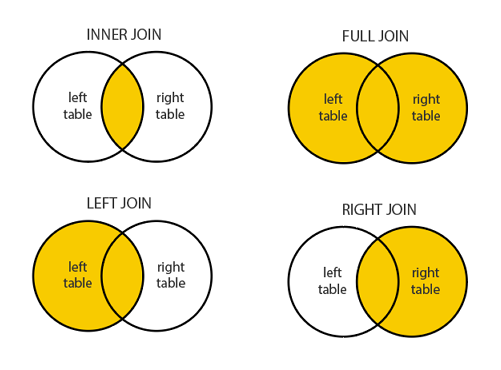

In [28]:
sql_command = '''select Student.name,
scores.score from Student INNER JOIN scores
ON Student.student_id = scores.student_id'''
cursor.execute(sql_command)
cursor.fetchall()

[('Amosu Kemisola', 55),
 ('Benedict Ebuka', 84),
 ('Amosu Kemisola', 67),
 ('James Helen', 73),
 ('Amosu Kemisola', 55),
 ('Benedict Ebuka', 84),
 ('Amosu Kemisola', 67),
 ('James Helen', 73),
 ('Amosu Kemisola', 55),
 ('Benedict Ebuka', 84),
 ('Amosu Kemisola', 67),
 ('James Helen', 73),
 ('Amosu Kemisola', 55),
 ('Benedict Ebuka', 84),
 ('Amosu Kemisola', 67),
 ('James Helen', 73)]

## READING AND WRITING TO DATABASE USING PANDAS
We can read and write data to the database using Pandas. The read_sql_query method of pandas library allows us to work with table data as a dataframe.

In [29]:
import pandas as pd
sql_command = '''Select * from Student'''
df = pd.read_sql_query(sql_command, conn)
df

,student_id,name,gender,DOB
0,148825,Adam John,Male,1998-10-22
1,149455,Benedict Ebuka,Male,1999-01-12
2,149623,Amosu Kemisola,Female,1997-12-02
3,148455,James Helen,Female,1998-06-12
4,151238,Chinedu Ruth,Male,1998-04-26
5,151240,Tayo Adeleke,Male,1999-10-09
6,158825,Adam John,Male,1998-10-22
7,159455,Benedict Ebuka,Male,1999-01-12
8,159623,Amosu Kemisola,Female,1997-12-02
9,158455,James Helen,Female,1998-06-12


We can also use the read_sql method of pandas which is a wrapper around the read_sql_table and read_sql_query methods of pandas.

In [30]:
df = pd.read_sql("Select student_id, name from Student", conn)
df

,student_id,name
0,148825,Adam John
1,149455,Benedict Ebuka
2,149623,Amosu Kemisola
3,148455,James Helen
4,151238,Chinedu Ruth
5,151240,Tayo Adeleke
6,158825,Adam John
7,159455,Benedict Ebuka
8,159623,Amosu Kemisola
9,158455,James Helen


To save a dataframe as an sql table, we use the to_sql method of pandas. These method takes a number of parameters such as the table name, the db connection, index, if_exists. for more information on this method, visit https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_sql.html

In [33]:
df = pd.DataFrame({'student_id':[131238, 131240],
                  'name':['Chinedu Ruth','Tayo Adeleke'],
                  'gender':['Male', 'Male'],
                  'DOB':['1998-04-26', '1999-10-09']})
df

,student_id,name,gender,DOB
0,131238,Chinedu Ruth,Male,1998-04-26
1,131240,Tayo Adeleke,Male,1999-10-09


In [34]:
df.to_sql('Student', conn, index = False, if_exists = 'append')

In [35]:
cursor.execute('select * from Student')
cursor.fetchall()

[(148825, 'Adam John', 'Male', '1998-10-22'),
 (149455, 'Benedict Ebuka', 'Male', '1999-01-12'),
 (149623, 'Amosu Kemisola', 'Female', '1997-12-02'),
 (148455, 'James Helen', 'Female', '1998-06-12'),
 (151238, 'Chinedu Ruth', 'Male', '1998-04-26'),
 (151240, 'Tayo Adeleke', 'Male', '1999-10-09'),
 (158825, 'Adam John', 'Male', '1998-10-22'),
 (159455, 'Benedict Ebuka', 'Male', '1999-01-12'),
 (159623, 'Amosu Kemisola', 'Female', '1997-12-02'),
 (158455, 'James Helen', 'Female', '1998-06-12'),
 (168825, 'Adam John', 'Male', '1998-10-22'),
 (169455, 'Benedict Ebuka', 'Male', '1999-01-12'),
 (169623, 'Amosu Kemisola', 'Female', '1997-12-02'),
 (168455, 'James Helen', 'Female', '1998-06-12'),
 (161238, 'Chinedu Ruth', 'Male', '1998-04-26'),
 (161240, 'Tayo Adeleke', 'Male', '1999-10-09'),
 (128825, 'Adam John', 'Male', '1998-10-22'),
 (129455, 'Benedict Ebuka', 'Male', '1999-01-12'),
 (129623, 'Amosu Kemisola', 'Female', '1997-12-02'),
 (128455, 'James Helen', 'Female', '1998-06-12'),
 (13